In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import seaborn as sbn


In [26]:
np.random.seed(0)

In [27]:
def readData():
    ''' Used to read the data from the csv format file into a pandas dataframe
        return a pandas DataFrame
    '''
    df = pd.read_csv('./data/abalone.csv', names = ['sex', 'length', 'diameter', 'height', 'wholeW', 'shuckedW', 'visceraW', 'shellW', 'rings']) #the names field is used to name the columns for easier visualization, since headings werer missing, I have hardcoded the same.
    return df

In [28]:
def preprocessData(data):
    ''' Used to preprocess the data. The input argument is a dataframe object.
        Modifies the dataframe in place.
    '''
    #Three new columns are added namely : 'M' , 'F' and 'I'.
    # Values are placed such that if a creature is male(sex=="M"), the column 'M' will be set to 1 and 'F','I' are set to 0. And similarly for female and infants.
    #In other words, a one hot encoding is applied to the representation
    data['M'] = np.where(data['sex'] == 'M', 1, 0)  #basically checks the dataframe, where 'sex' column is equal to "M", it puts 1 in the column 'M' otherwise zero 
    data['F'] = np.where(data['sex'] == 'F', 1, 0)  #basically checks the dataframe, where 'sex' column is equal to "F", it puts 1 in the column 'F' otherwise zero
    data['I'] = np.where(data['sex'] == 'I', 1, 0)  #basically checks the dataframe, where 'sex' column is equal to "I", it puts 1 in the column 'I' otherwise zero


In [29]:
def extractFeatureAndResult(data):
    ''' Used to split the dataframe into input(features data) and the outcome(output result data)
        Input: pandas dataframe object
        returns two splitted data object : a dataframe with the input(feature data) and a series with the output(result/outcome) data.
    '''
    featureData = data.drop(['rings', 'sex'], axis='columns') #Extract and store the input feature data in featureData.Dropping the column 'sex' because I have replaced it with three new columns as explain in the block above. Also, drop the column 'rings' as it is the output/result column.
    Y_actual = data['rings'] #Similarly extract and store the ouput/result data ('rings' column) into the Y_actual
    return featureData, Y_actual

In [30]:
def transposeAndConvertType(data):
    '''A utility method is used to convert a dataframe object into a numpy array which is then transposed and its datatype is modified to float64
       Input is a pandas dataframe or series and the method returns a numpy array after transforming it by the method explained.
    '''
    transposedData = np.transpose(np.array(data))
    transposedData = transposedData.astype(np.float64)  
    return transposedData


In [31]:
def split_test_train(feature_df, output_df, test_size):
    ''' Used to split the dataset into training and testing set.
        Input are two pandas data-based objects, feature_df: feature(input data) and output_df: the outcome(output/result) data, 
        And test_size : a positive float value in range [0,1] representing ratio of test data size to the whole dataset
        Returns four numpy arrays : train_feature - Training feature(input) data, test_feature - Testing feature(input) data, 
        train_Y - Training result/output data, test_Y - Testing result/output data
    '''
    feature_data = np.array(feature_df) #convert to numpy ndarray
    output_data = np.array(output_df) #convert to numpy ndarray
    M = feature_data.shape[0]

    num_train_sample = int((1 - test_size)*M) #computing training data size from the test_size
    
    #slicing operations to form training, validation, testing splits.
    train_feature = feature_data[:num_train_sample]  #splitting and extracting training input feature data from the whole feature data
    train_Y = output_data[:num_train_sample]         #splitting and extracting training output result data from the whole output result data
    test_feature = feature_data[num_train_sample:]   #splitting and extracting testing input feature data from the whole feature data
    test_Y = output_data[num_train_sample:]          #splitting and extracting testing output result data from the whole output result data
    return train_feature, test_feature, train_Y, test_Y


In [32]:
def splitAndConvert(feature_data, output_data, test_split_size):
    ''' Used for handling/processing the data further.This method calls the splitting method internally to get the train,test splitted data 
        and then transforms it to numpy array formats by converting its type and taking its transposed, and then inserting a row of zeros(to handle bias term)
        Input are two pandas data-based objects, feature_data: feature(input data) and output_data: the outcome(output/result) data, 
        And test_split_size : a positive float value in range [0,1] representing ratio of test data size to the whole dataset
        Returns four transformed numpy arrays containg our data: inputTrain - Training feature(input) data, inputTest - Testing feature(input) data, 
        YTrain - Training result/output data, YTest - Testing result/output data
        
    '''

    featureTrainData, featureTestData, YTrainData, YTestData = split_test_train(feature_data, output_data, test_split_size) #used to split the dataset

    inputTrain = transposeAndConvertType(featureTrainData) #take transpose adn convert type to numpy.float64
    inputTest = transposeAndConvertType(featureTestData) #take transpose adn convert type to numpy.float64
    YTrain = transposeAndConvertType(YTrainData) #take transpose adn convert type to numpy.float64
    YTest = transposeAndConvertType(YTestData) #take transpose adn convert type to numpy.float64

    #Note : I have taken transpose here because I have considered input to be in form of column vectors. i.e- for N input features and M number of training samples, size of my input matrix is NxM where each column represents a sample.
    #       The output (result) i.e - notationally Y is of the form 1XM where i^th column of the first and the only row represents i^th indexed outcome/result value
    
    inputTrain = np.insert(inputTrain, inputTrain.shape[0], values=1, axis=0) #insert a row of ones in the input/feature dataset to handle the bias term
    inputTest = np.insert(inputTest, inputTest.shape[0], values=1, axis=0) #insert a row of ones in the input/feature dataset to handle the bias term

    num_data_train = YTrain.shape[0] 
    num_data_test = YTest.shape[0]
    YTrain = YTrain.reshape((1, num_data_train))
    YTest = YTest.reshape((1, num_data_test))
    
    return inputTrain, inputTest, YTrain, YTest


In [33]:
def plotHistogram(dataset):
    sbn.histplot(dataset.length)
    plt.show()
    sbn.histplot(dataset.diameter)
    plt.show()
    sbn.histplot(dataset.height)
    plt.show()
    sbn.histplot(dataset.wholeW)
    plt.show()
    sbn.histplot(dataset.shuckedW)
    plt.show()
    sbn.histplot(dataset.visceraW)
    plt.show()
    sbn.histplot(dataset.shellW)
    plt.show()

In [34]:
def performDataOperations():
    ''' This function is calls all the above made functions and is kind of a master function that internally performs all data handling operations 
        that is reading, extracting, spliting and formatting/transforming the data according to our requirement.
        Returns four numpy arrays : X_train - Training feature(input) data, X_test - Testing feature(input) data, 
        Y_train - Training result/output data, Y_test - Testing result/output data. These are further used in the code to access the data from.
    '''
    dataset = readData() #read the dataset
    
    preprocessData(dataset) #preprocess it (Add columns)

    featureData, Y_actual = extractFeatureAndResult(dataset) #drop unecessary columns and extract the feature and outcome/result data from the dataframe.
    # print(featureData)
    # print(Y_actual)
    X_train, X_test, Y_train, Y_test = splitAndConvert(featureData, Y_actual, 0.2) #split the dataset with testing data size 0.2 times the original data size (20%) and convert it into required form


    return X_train, X_test, Y_train, Y_test


Q1.1 Implementing Linear Regression from scratch

In [35]:
def getPredictedValue(X, theta):
  ''' This function is used to find the predicted value given an input X and a theta value. 
      Input : X - numpy nd array containing the input feature data in column vector format (one column is one sample). 
      Also a theta : parameter (coefficients) of size Nx1, where N is number of features (including the column of all zeros inserted to handle bias term).
      Returns : A numpy ndarray Y_hat having the predicted values corresponding to each column(sample) in the input matrix X.It is of size 1xM where M is number of samples (comlumns) in input parameter X.
  '''
  theta_transpose = np.transpose(theta) #firstly take transpose of theta
  Y_hat = np.dot(theta_transpose, X) #apply the formula of dot product of theta transpose and X to get the preducted outcome/result values.
  return Y_hat

In [36]:
def getMSE(Y, Y_hat):
  ''' The function is used to find Mean Square Error.
      Input : Y_hat - the predicted values, Y - the actual true results/values corresponding to the predicted valuesSizes of both are (1 X K) where K = no. of samples you have predicted the outcome for.
      Returns a decimal number representing the mean square error
  '''
  sq_err = np.square(np.subtract(Y_hat, Y)) #Finding the square of difference of Y_hat and Y
  sigma_sq_err = np.sum(sq_err) #finding the sum of all such terms to calculate the sigma of squared error[(Y_hat - Y)^2].
  mean_square_error = sigma_sq_err / (2*(Y.shape[1])) #finding the mean of the same(note we divide by 2 times the number of samples in Y_hat or Y. This is to facilitate easier derivatives later in theory.)
  return mean_square_error

In [37]:
def getRMSE(Y, Y_hat):
    ''' The function is used to find Root Mean Square Error.
        Input : Y_hat - the predicted values, Y - the actual true results/values corresponding to the predicted values.Sizes of both are (1 X K) where K = no. of samples you have predicted the outcome for.
        Returns a decimal number representing the Root mean square error
    '''
    sq_err = np.square(np.subtract(Y_hat, Y)) #Finding the square of difference of Y_hat and Y
    sigma_sq_err = np.sum(sq_err) #finding the sum of all such terms to calculate the sigma of squared error[(Y_hat - Y)^2].
    root_mean_square_error = np.sqrt(sigma_sq_err / (Y.shape[1])) #finding the root of the mean of the squared error
    return root_mean_square_error

In [38]:
def performGradientDescent(curr_theta, alpha, X, Y):
  ''' The gradient descent function. Used to perform one iteration of the gradient descent algorithm.The functions calculates 
      the gradient with respect to a particular input(X) and output(Y) sample.
      Input : curr_theta - the current value of theta(coefficients) before performing an iteration of gradient descent.alpha - learning rate.
              X, Y - user gives valid feature data(X) and valid output data(Y) 
      Returns the updated value of theta/coefficients after performing one iteration of gradient descent
  '''
  M = X.shape[1]
  Y_hat = getPredictedValue(X, curr_theta) #firstly find the predicted value
  dJ_theta = (np.dot(X, np.transpose((Y_hat - Y)))) / (M)  #calculate the gradient term which is partial derivative of cost wrt to theta.
  updated_theta = curr_theta - (alpha * dJ_theta) #update theta using the value of the gradient and the learning rate(alpha)

  return updated_theta  

In [39]:
def performLinearRegression(X, Y, number_of_epochs, alpha_value):
  ''' This function is the main function that performs linear regression.Uses the gradient descent function and runs for certain epochs to perform linear
      regression and find a estimate for the best model coefficients.
      Input : X, anumpy ndarray, is the feature dataset used to train the model (acts as the training set feature data for the model). 
              Y, anumpy ndarray, is the output/outcome/result dataset used to train the model (acts as the training set output/outcome/result data for the model).
              number_of_epochs is the number of epochs for the algorithm to perform gradient descent.
              alpha_value : The learning rate for the model
      Returns the best model coefficients computed for the given training data by performing linear regression.
  '''
  num_epochs = number_of_epochs
  theta_params = np.random.rand(X.shape[0], 1) #a randomly initialized numpy ndarray to hold the model coefficients in column wise form.
  learning_rate = alpha_value #the learning rate for the model
  cost_list = [] #the list to hold the cost/loss at all epochs on the training data using the current value of model coefficients.Used for plotting loss vs epochs curve

  for i in range(num_epochs):
    predicted_value = getPredictedValue(X, theta_params) #find the predicted value using current value of theta
    iteration_cost = getMSE(Y, predicted_value) #find the MSE for the prediction on training input set for the current epoch
    cost_list.append(iteration_cost)
    update_theta = performGradientDescent(theta_params, learning_rate, X, Y) #perform gradient descent algorithm using current value of theta and alpha. This is used to update the value of theta at every epoch.
    theta_params = update_theta

  #piece of code used to plot the MSE vs epochs plot
  plt.plot(cost_list)
  plt.xlabel('epochs')
  plt.ylabel('Loss (MSE)')
  plt.title('Train loss (MSE) vs epochs')
  # plt.savefig('./plots/Q1/linear_regression.png', facecolor='white', transparent=False)
  plt.show()
  
  return theta_params

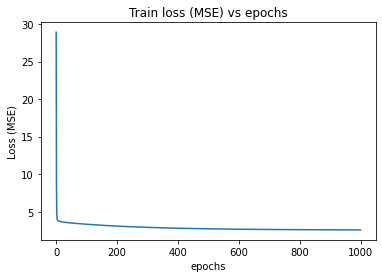

RMSE on Training Data: 2.269647839399355
RMSE on Testing Data: 2.005072099966354


In [40]:
# A block to test linear regression
input_train, input_test, Y_actual_train, Y_actual_test = performDataOperations() #used to gather the data using the performDataOperations() function which inside, handles all the data operations.
model_parameters = performLinearRegression(input_train, Y_actual_train, 1000, 0.5) #perform linear regression and train on training data
trainRMSE = getRMSE(Y_actual_train, getPredictedValue(input_train, model_parameters)) #calculate the RMSE on Training data
testRMSE = getRMSE(Y_actual_test, getPredictedValue(input_test, model_parameters)) #calculate the RMSE on Testing data
print(f'RMSE on Training Data: {trainRMSE}')
print(f'RMSE on Testing Data: {testRMSE}')

Q1.2 (A)

In [41]:
def performRidgeRegression(XTrain_data, YTrain_data, XTest_data, YTest_data, alpha_desc):
    ''' Function is used to apply ridgeregularization technique to regression. A range of learning rates (alpha values) are chosen and the model fitted on the training dataset using these alphas
        one at a time is used to predict output value on the testing input and thus find the RMSE for that prediction. This process is continued for all values of alpha in the alpha range list.
        Input : (XTrain_data, YTrain_data) : training dataset, (XTest_data, YTest_data) : testing dataset, alpha_desc is a list of size 3 containing alpha's range's lower limit,
        upperlimit and step-size respectively in order.
        It plots the variation of RMSE for the prediction v/s the value of learning rate alpha
        Returns : The list with all alphas(learning rates) used, a list containig the RMSEs for all values of alphas used, a dictionary with the model coefficients for the used values of alphas(keys) in the model, and a dictionary with model parameters for used alpha values

    '''
    testRMSE_ridge_list = [] #used to hold the testing data's RMSEs for ridge regression
    alpha_range = np.arange(alpha_desc[0], alpha_desc[1], alpha_desc[2]) #make a range list for all the alpha values to be used
    model_coeffs = {} #a dictionary with the model coefficients for the used values of alphas(used as keys) in the model
    model_params = {} #a dictionary with the model parameter for the used values of alphas(used as keys) in the model

    for i in range(len(alpha_range)):

        model = Ridge(alpha=alpha_range[i]) #create the Ridge model with the value of alpha from the range list of alphas
        model.fit(XTrain_data, YTrain_data) #fit the model using the training datasets

        YPredict_data = model.predict(XTest_data) #predict through model using the testing dataset input
        model_coeffs[alpha_range[i]] = model.coef_.reshape((XTrain_data.shape[1], 1)) #finding and storing the model coefficient for the current model
        model_params[alpha_range[i]] = model.get_params() #finding and storing the model parameters for the current model
        testRMSE_ridge = getRMSE(np.transpose(YTest_data), np.transpose(YPredict_data)) #calculate the test data's RMSE for the current model prediction 
        testRMSE_ridge_list.append(testRMSE_ridge)


    #plotting the plot for variation of testing data RMSE vs alpha value
    plt.plot(alpha_range, testRMSE_ridge_list)
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title("Ridge")
    # plt.savefig('./plots/Q1/ridge_regression.png', facecolor='white', transparent=False)
    plt.show()
    

    return alpha_range, model_coeffs, testRMSE_ridge_list, model_params


In [42]:
def performLassoRegression(XTrain_data, YTrain_data, XTest_data, YTest_data, alpha_desc):
    '''Function is used to apply lasso regularization technique to regression. A range of learning rates (alpha values) are chosen and the model fitted on the training dataset using these alphas
        one at a time is used to predict output value on the testing input and thus find the RMSE for that prediction. This process is continued for all values of alpha in the alpha range list.
        Input : (XTrain_data, YTrain_data) : training dataset, (XTest_data, YTest_data) : testing dataset, alpha_desc is a list of size 3 containing alpha's range's lower limit,
        upperlimit and step-size respectively in order.
        It plots the variation of RMSE for the prediction v/s the value of learning rate alpha
        Returns : The list with all alphas(learning rates) used, a list containig the RMSEs for all values of alphas used, a dictionary with the model coefficients for the used values of alphas(keys) in the model, and a dictionary with model parameters for used alpha values
    '''
    testRMSE_lasso_list = [] #used to hold the testing data's RMSEs for lasso regression
    alpha_range = np.arange(alpha_desc[0], alpha_desc[1], alpha_desc[2]) #make a range list for all the alpha values to be used
    model_coeffs = {} #a dictionary with the model coefficients for the used values of alphas(used as keys) in the model
    model_params = {} #a dictionary with the model parameter for the used values of alphas(used as keys) in the model
    for i in range(len(alpha_range)):

        model = Lasso(alpha=alpha_range[i]) #create the Ridge model with the value of alpha from the range list of alphas
        model.fit(XTrain_data, YTrain_data) #fit the model using the training datasets

        YPredict_data = model.predict(XTest_data) #predict through model using the testing dataset input
        model_coeffs[alpha_range[i]] = model.coef_.reshape((XTrain_data.shape[1], 1)) #finding and storing the model coefficient for the current model
        model_params[alpha_range[i]] = model.get_params() #finding and storing the model parameters for the current model
        testRMSE_lasso = getRMSE(np.transpose(YTest_data), np.transpose(YPredict_data)) #calculate the test data's RMSE for the current model prediction
        testRMSE_lasso_list.append(testRMSE_lasso)

    #plotting the plot for variation of testing data RMSE vs alpha value
    plt.plot(alpha_range, testRMSE_lasso_list)
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title("Lasso")
    # plt.savefig('./plots/Q1/lasso_regression.png', facecolor='white', transparent=False)
    plt.show()

    return alpha_range, model_coeffs, testRMSE_lasso_list, model_params


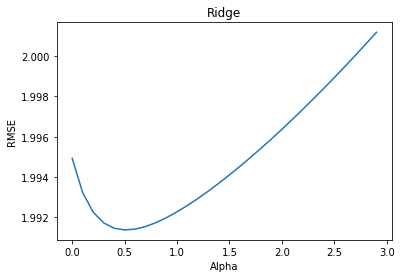

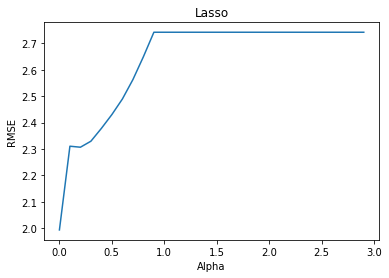

Ridge Regression
Min Test RMSE: 1.991365202774594
Best Coeff:
 [[  1.26009921]
 [  8.94763706]
 [  7.69302601]
 [  7.74571831]
 [-18.49644112]
 [ -8.44308261]
 [ 10.54362886]
 [  0.29995697]
 [  0.30347425]
 [ -0.60343122]
 [  0.        ]] 
Alpha: 0.501 
Lasso Regression
Min Test RMSE: 1.9931470657708505
Best Coeff:
 [[ 0.00000000e+00]
 [ 1.06629548e+01]
 [ 7.77979057e+00]
 [ 8.39102025e+00]
 [-1.93555392e+01]
 [-9.04584875e+00]
 [ 9.92156069e+00]
 [ 9.33238839e-04]
 [-0.00000000e+00]
 [-8.83524714e-01]
 [ 0.00000000e+00]] 
Alpha: 0.001


In [43]:
#The block to test and run ridge and lasso regression

#taking transpose of the numpy arrays for the training data and testing data
original_train_X = np.transpose(input_train)
original_test_X = np.transpose(input_test)
original_train_Y = np.transpose(Y_actual_train)
original_test_Y = np.transpose(Y_actual_test)

alpha_desc_ridge = [0.001, 3, 0.1] #alpha range for ridge [(low,high,step-size)]
alpha_desc_lasso = [0.001, 3, 0.1] #alpha range for lasso [(low,high,step-size)]
alpha_range_ridge, coeff_ridge, testRMSE_ridge,params_ridge = performRidgeRegression(original_train_X, original_train_Y, original_test_X, original_test_Y, alpha_desc_ridge)
alpha_range_lasso, coeff_lasso, testRMSE_lasso, params_lasso = performLassoRegression(original_train_X, original_train_Y, original_test_X, original_test_Y, alpha_desc_lasso)

ridge_min = testRMSE_ridge.index(min(testRMSE_ridge)) #finding the minimum RMSE for ridge case
best_coeff_ridge = coeff_ridge[alpha_range_ridge[ridge_min]] #finding the best coefficient (corresponding to lowest RMSE) for ridge case
best_params_ridge = params_ridge[alpha_range_ridge[ridge_min]] #finding the best parameter(alpha) (corresponding to lowest RMSE) for ridge case
print(f'Ridge Regression\nMin Test RMSE: {min(testRMSE_ridge)}\nBest Coeff:\n {best_coeff_ridge} \nAlpha: {best_params_ridge["alpha"]} ')

lasso_min = testRMSE_lasso.index(min(testRMSE_lasso)) #finding the minimum RMSE for lasso case
best_coeff_lasso = coeff_lasso[alpha_range_lasso[lasso_min]] #finding the best coefficient (corresponding to lowest RMSE) for lasso case
best_params_lasso = params_lasso[alpha_range_lasso[lasso_min]] #finding the best parameter(alpha) (corresponding to lowest RMSE) for lasso case
print(f'Lasso Regression\nMin Test RMSE: {min(testRMSE_lasso)}\nBest Coeff:\n {best_coeff_lasso} \nAlpha: {best_params_lasso["alpha"]}')

Q 1.2 (B)

In [44]:
def performGridSearch(x_train, y_train, method, alpha_desc):
    ''' This function is used for selecting the best alpha, coefficient and rmse value for the model using sklearn's grid search function GridSearchCV.
        Input : (x_train, y_train) - training dataset, method : a string value in which is either "Ridge" or "Lasso" depending on what type of 
        regularization technique is to be chosen, alpha_desc: A list of size 3 containing alpha's range's lower limit, upperlimit and step-size respectively in order.
        Returns : best_alpha - the best case alpha value, best_coefficient - best case model coefficient, best_rmse - best case RMSE 
    '''
    if(method == "Ridge"):
        model = Ridge() #if method is "Ridge" create a Ridge model
    elif(method == "Lasso"):
        model = Lasso() #if method is "Lasso" create a Ridge model
    alpha_list = np.arange(alpha_desc[0], alpha_desc[1], alpha_desc[2]) #make a range list for all the alpha values to be used
    alpha_params = {'alpha':alpha_list} #dictionary with a key 'alpha; corresponding to value alpha_list (the list of all alphas)
    grid = GridSearchCV(estimator=model, param_grid=alpha_params, scoring='neg_mean_squared_error') #calling the GridSearchCV method of sklearn to perform the technqiue, the estimator is passed as the model created, grid parameters are the alpha list values, scoring used is 'neg_mean_squared_error'
    grid.fit(x_train, y_train) #run the fit with training dataset
    
    best_coefficient = grid.best_estimator_.coef_ #finding the best model coefficient
    best_coefficient = best_coefficient.reshape((x_train.shape[1], 1)) #reshaping it to ((N x 1)) where N is number of features (including the added column for the bias term)
    best_alpha = grid.best_params_ #finding the best alpha (parameters)

    return best_alpha, best_coefficient

In [45]:
# A block to test and perform the grid search on the data to finding best alpha, model coefficients and best RMSE for both ridge and lasso.

best_alpha_lasso, best_coeff_lasso_grid = performGridSearch(original_train_X, original_train_Y, "Lasso", [0.001, 3, 0.1])
best_alpha_ridge, best_coeff_ridge_grid = performGridSearch(original_train_X, original_train_Y, "Ridge", [0.001, 3, 0.1])

print(f'Ridge Regression\nBest Alpha : {best_alpha_ridge}\nBest Coefficient:\n{best_coeff_ridge_grid}\n')
print(f'Lasso Regression\nBest Alpha : {best_alpha_lasso}\nBest Coefficient:\n{best_coeff_lasso_grid}\n')

Ridge Regression
Best Alpha : {'alpha': 0.401}
Best Coefficient:
[[  0.92322767]
 [  9.43128582]
 [  7.93748047]
 [  7.97325832]
 [-18.76787046]
 [ -8.83672402]
 [ 10.35585794]
 [  0.29916879]
 [  0.30021564]
 [ -0.59938443]
 [  0.        ]]

Lasso Regression
Best Alpha : {'alpha': 0.001}
Best Coefficient:
[[ 0.00000000e+00]
 [ 1.06629548e+01]
 [ 7.77979057e+00]
 [ 8.39102025e+00]
 [-1.93555392e+01]
 [-9.04584875e+00]
 [ 9.92156069e+00]
 [ 9.33238839e-04]
 [-0.00000000e+00]
 [-8.83524714e-01]
 [ 0.00000000e+00]]



In [46]:
def compareCoefficients (grid_coeffs, model_coeffs):
    euclidean_distance = np.sqrt(np.sum(np.square(grid_coeffs - model_coeffs)))
    return euclidean_distance

In [47]:
comparison_ridge = compareCoefficients(best_coeff_ridge_grid, best_coeff_ridge)
comparison_lasso = compareCoefficients(best_coeff_lasso_grid, best_coeff_lasso)
print(f'Ridge :{comparison_ridge}')
print(f'Lasso : {comparison_lasso}')

Ridge :0.8502023171814787
Lasso : 0.0
